# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

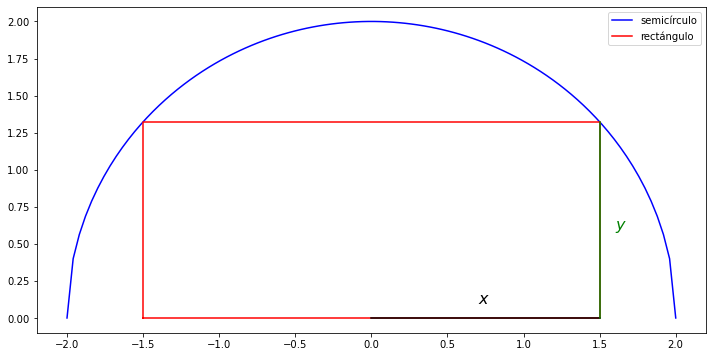

In [25]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

---
Se desea encontrar el área máxima
$$
A=2xy.
$$
Trazando un triángulo rectángulo con vértices en $(0,0)$, $(0,x)$, $(x,y)$, se tiene
$$
r^2=x^2+y^2,
$$
con $r=2$ siendo el radio del semi-círculo.

Sustituyendo el área, resulta
$$
A=2x\sqrt{2^2-x^2}.
$$
Para $0<x<2$.

---

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [27]:
import sympy as sym

In [26]:
# Definición del área
def A(x):
    return 2*x*(2**2-x**2)**(1/2)

In [28]:
sym.var('x',real=True) # Definición de la variable simbólica
dA=sym.diff(A(x),x)    # Encontramos la derivada de 'A(x)' con respecto de 'x'
c=sym.solve(dA,x)      # Encontramos los puntos críticos
c                      # Tomamos el valor positivo

[-1.41421356237310, 1.41421356237310]

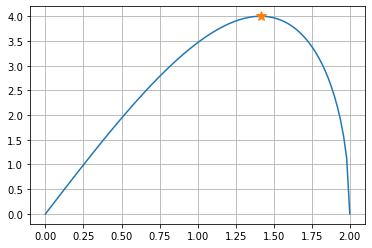

In [29]:
xnum=np.linspace(0,2,100)
ynum=A(xnum)
plt.plot(xnum,ynum)
plt.plot(c[1],A(c[1]),'*',ms=10) # Segundo punto crítico
plt.grid()

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [30]:
b=2*c[1] # 2*x
b

2.82842712474619

In [31]:
h=(2**2-c[1]**2)**(1/2)  # sqrt(2**2-x**2)
h

1.41421356237309

Para que el área sea máxima, las dimensiones deben ser
$$
b=2.83
$$
$$
h=1.41
$$

---

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [10]:
import pandas as pd

In [4]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
datos=pd.read_csv('salarios_minimos.csv') # Importamos los datos
datos.head()                              # Mostramos los primeros cinco datos

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

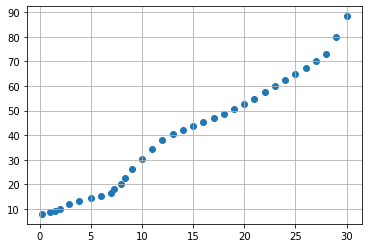

In [4]:
x=datos['Periodo']-1988 # Le restamos 1988 para evitar problemas con las potencias
y=datos['Salario']
plt.scatter(x,y)
plt.grid()

In [5]:
import scipy.optimize as opt

In [6]:
opt.minimize?

In [7]:
# Definimos el criterio de optimización
# Mínimos cuadrados
def fun(B,x,y):
    f1=B[0]+B[1]*x           # Polinomio de grado uno
    return np.sum((y-f1)**2) # Suma de los errores (de ajuste) al cuadrado

In [8]:
B0=np.random.rand(2) # Necesitamos dos coeficientes
sol1=opt.minimize(fun,B0,args=(x,y))
sol1

      fun: 276.88722086932086
 hess_inv: array([[ 0.05133884, -0.00258391],
       [-0.00258391,  0.00018226]])
      jac: array([0.00000000e+00, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([3.715578  , 2.52832883])

In [9]:
# Polinomio óptimo de grado uno :)
f1=sol1.x[0]+sol1.x[1]*x

In [14]:
# Ahora los polinomios de grado 2 y grado 3
def fun2(B,x,y):
    f2=B[0]+B[1]*x+B[2]*x**2  # Polinomio de grado 2
    return np.sum((y-f2)**2)  # Mínimos cuadrados para f2
def fun3(B,x,y):
    f3=B[0]+B[1]*x+B[2]*x**2+B[3]*x**3  # Polinomio de grado 3
    return np.sum((y-f3)**2)            # Mínimos cuadrados para f3

In [16]:
B0=np.random.rand(3)                  # Necesitamos tres coeficientes para el polinomio de grado dos
sol2=opt.minimize(fun2,B0,args=(x,y))
sol2

      fun: 258.55443749395545
 hess_inv: array([[ 1.08572516e-01, -1.48043063e-02,  4.11875223e-04],
       [-1.48043063e-02,  2.79152702e-03, -8.79426370e-05],
       [ 4.11875223e-04, -8.79426370e-05,  2.96401079e-06]])
      jac: array([8.39233398e-05, 4.57763672e-05, 9.15527344e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 182
      nit: 6
     njev: 43
   status: 2
  success: False
        x: array([5.16417743, 2.21902795, 0.01042464])

In [17]:
B0=np.random.rand(4)
sol3=opt.minimize(fun3,B0,args=(x,y))
sol3

      fun: 254.084979561098
 hess_inv: array([[ 1.77495445e-01, -4.46708834e-02,  2.97306317e-03,
        -5.74476726e-05],
       [-4.46708834e-02,  1.57282798e-02, -1.19715085e-03,
         2.48776437e-05],
       [ 2.97306317e-03, -1.19715085e-03,  9.80639427e-05,
        -2.13288063e-06],
       [-5.74476726e-05,  2.48776437e-05, -2.13288063e-06,
         4.78352839e-08]])
      jac: array([5.89370728e-03, 1.71918869e-01, 2.45749283e+00, 3.47161140e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 262
      nit: 6
     njev: 50
   status: 2
  success: False
        x: array([ 4.37972831e+00,  2.55839082e+00, -1.86565818e-02,  6.52050325e-04])

In [18]:
B=sol2.x                            # Asignación del arreglo óptimo para 'B'
f2=B[0]+B[1]*x+B[2]*x**2            # Polinomio óptimo de grado 2

B=sol3.x                            # Asignación del arreglo óptimo para 'B'
f3=B[0]+B[1]*x+B[2]*x**2+B[3]*x**3  # Polinomio óptimo de grado 3

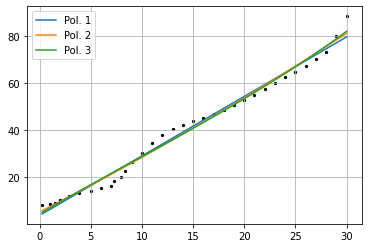

In [19]:
plt.scatter(x,y,c='k',s=5) # Ponemos puntos negros más pequeños
plt.plot(x,f1,label='Pol. 1')
plt.plot(x,f2,label='Pol. 2')
plt.plot(x,f3,label='Pol. 3')
plt.legend()
plt.grid()

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [20]:
xe=2019-1988
xe

31

In [21]:
# Estimaciones para el año 2019
f1_e=sol1.x[0]+sol1.x[1]*xe
f2_e=sol2.x[0]+sol2.x[1]*xe+sol2.x[2]*xe**2
f3_e=sol3.x[0]+sol3.x[1]*xe+sol3.x[2]*xe**2+sol3.x[3]*xe**3

In [22]:
f1_e, f2_e, f3_e

(82.0937717558306, 83.97212519451749, 85.18609988959967)

In [23]:
sol3.x

array([ 4.37972831e+00,  2.55839082e+00, -1.86565818e-02,  6.52050325e-04])

El polinomio que mejor estima el dato real es el polinomio de grado 3
$$
Salario\approx 4.37+2.55x-0.0187x^2+0.000652x^3,
$$
donde $x$ es el Periodo menos 1988.